# HDP

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import pycaret as pc

In [5]:
import sklearn as sk

In [6]:
from pycaret.nlp import *

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
data = pd.read_csv("./kiva.csv", sep=',', decimal='.', verbose= True, engine='c') 

Tokenization took: 37.11 ms
Type conversion took: 39.08 ms
Parser memory cleanup took: 0.01 ms


In [9]:
data.shape

(6818, 7)

In [10]:
data.head()

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [11]:
data = data.sample(1000, random_state=786).reset_index(drop=True)

In [12]:
data.shape

(1000, 7)

In [13]:
exp_nlp101 = setup(data = data, 
                   target = 'en', 
                   custom_stopwords = ['loan', 'income', 'usd', 'many', 'also', 'make', 'business', 'buy', 
                                       'sell', 'purchase','year', 'people', 'able', 'enable', 'old', 'woman',
                                       'child', 'school'],
                   session_id = 101,
                   log_experiment = True,
                   experiment_name = 'EX001')

Description,Value
session_id,101
Documents,1000
Vocab Size,4636
Custom Stopwords,True


In [14]:
hdp = create_model('hdp', num_topics = 4, multi_core = True)

In [15]:
print(hdp)

In [16]:
hdp_results = assign_model(hdp)

In [17]:
hdp_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic
0,Kenya,praxide marry primary train tailor operate sma...,F,75,partner,Services,0,0.463218,0.527411,0.000000,0.0,Topic 1
1,Kenya,gynaecology practitioner run live wife biologi...,M,1200,partner,Health,0,0.560904,0.217935,0.218298,0.0,Topic 0
2,Dominican Republic,live boy girl range new use clothing support f...,F,150,partner,Clothing,0,0.617427,0.000000,0.371941,0.0,Topic 0
3,Kenya,phanice marry daughter secondary boy primary f...,F,150,lender,Services,1,0.982208,0.000000,0.000000,0.0,Topic 0
4,Kenya,hotel last get good return competition increas...,F,300,lender,Food,1,0.916345,0.000000,0.075221,0.0,Topic 0


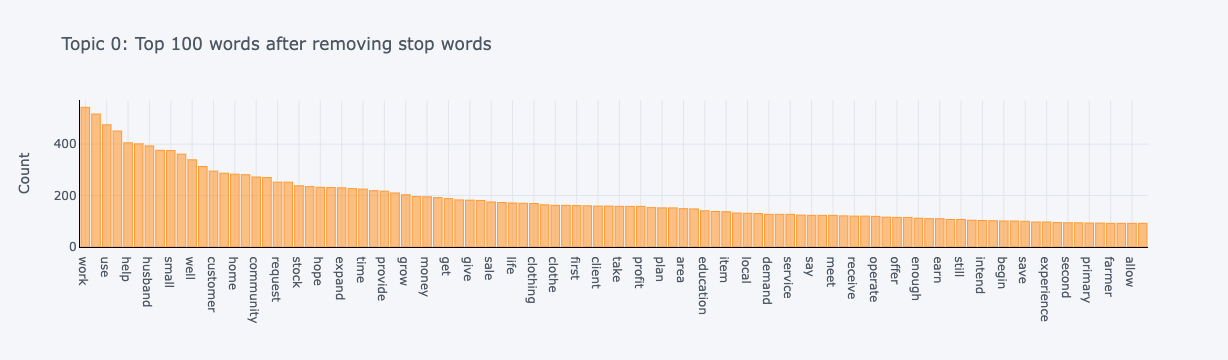

In [18]:
plot_model(hdp)

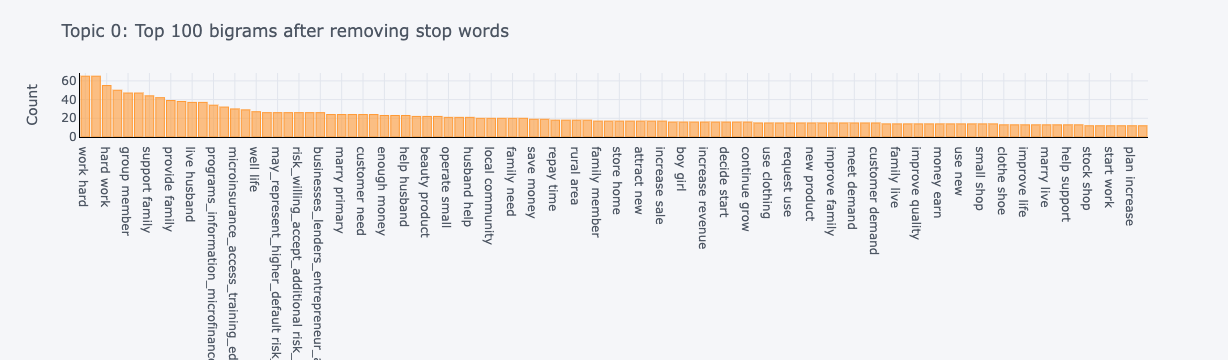

In [19]:
plot_model(model=hdp, plot = 'bigram')

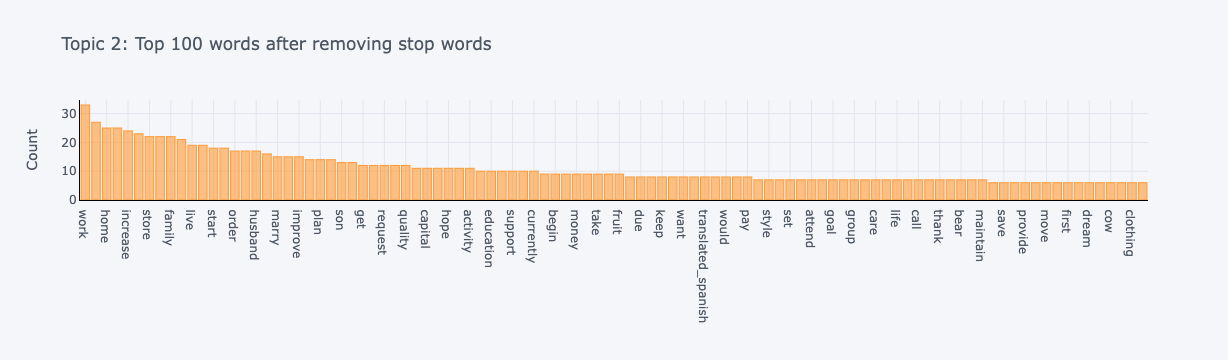

In [20]:
plot_model(hdp, plot = 'frequency', topic_num = 'Topic 2')

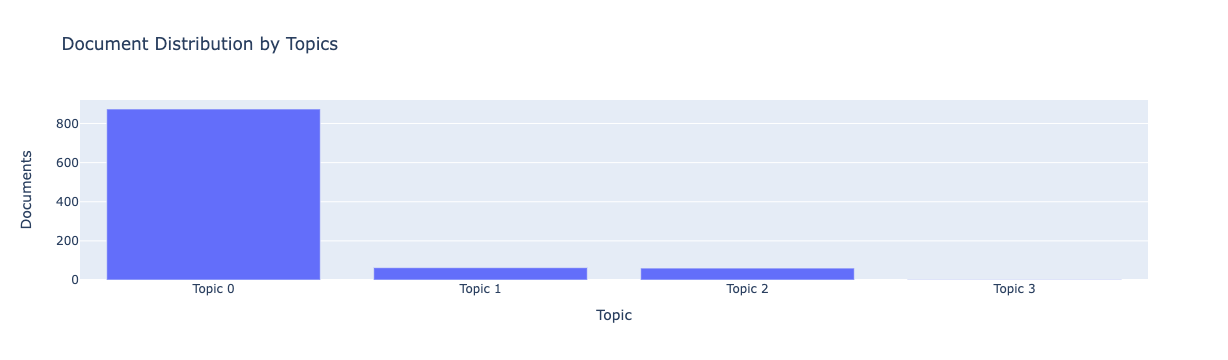

In [21]:
plot_model(hdp, plot = 'topic_distribution')

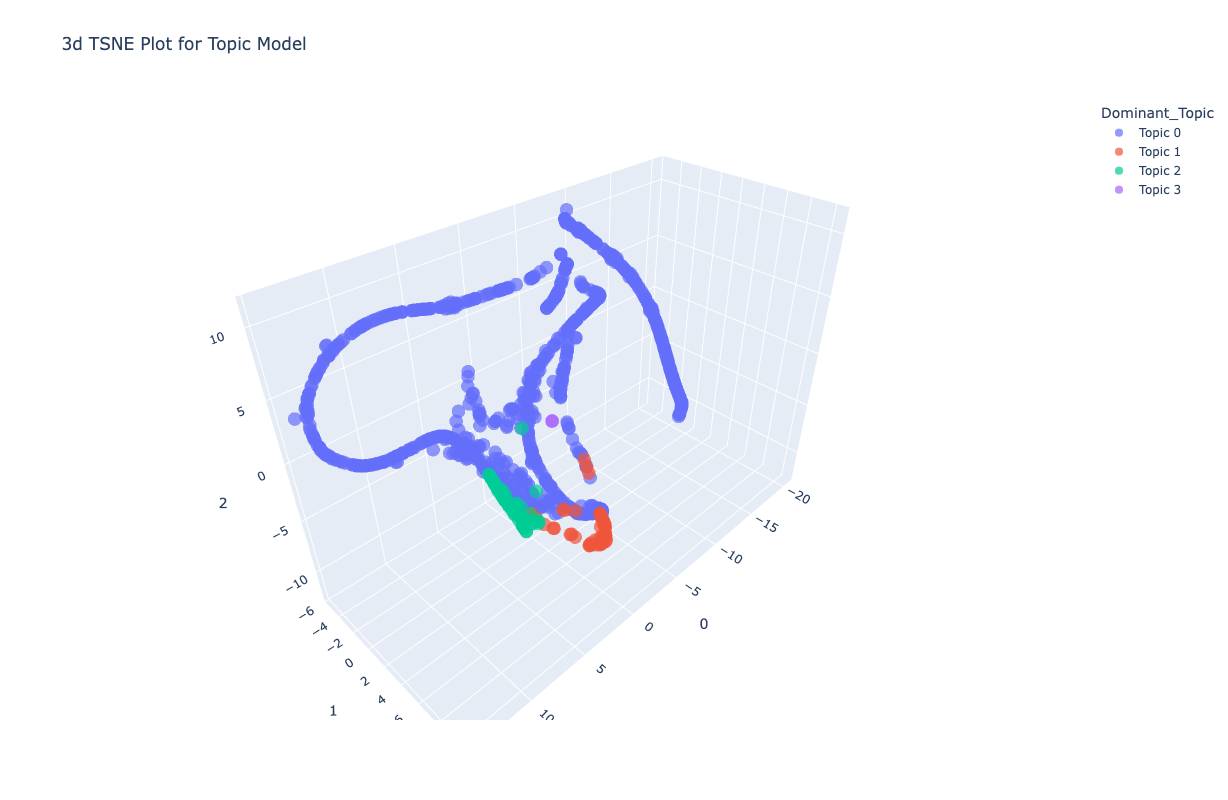

In [22]:
plot_model(hdp, plot = 'tsne')

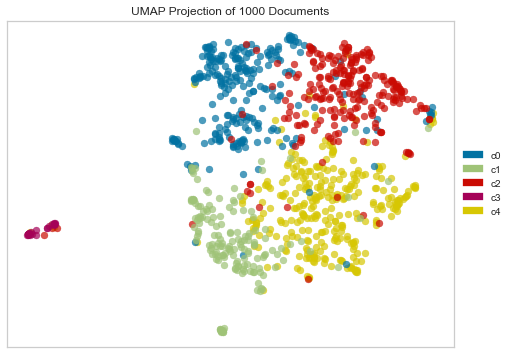

In [23]:
plot_model(hdp, plot = 'umap')